In [3]:
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori

In [2]:
# sử dụng list để lưu danh sách các mục
dataset = [['Eggs', 'Milk', 'Onion', 'Nutmeg', 'Kidney Beans', 'Yogurt'],
           ['Dill', 'Onion', 'Nutmeg', 'Eggs', 'Yogurt'],
           ['Milk', 'Apple', 'Kidney Beans', 'Eggs'],
           ['Milk', 'Unicorn', 'Corn', 'Kidney Beans', 'Yogurt'],
           ['Corn', 'Onion', 'Kidney Beans', 'Ice cream', 'Eggs'],
           ['Orange', 'Corn', 'Eggs', 'Yogurt'],
           ['Milk', 'Apple', 'Orange', 'Eggs'], 
           ['Corn', 'Coke', 'Kidney Beans', 'Ice cream'],
           ['Dill', 'Onion', 'Nutmeg'],
           ['Coke', 'Apple', 'Ice cream']
          ]

In [5]:
te = TransactionEncoder()
te_ary = te.fit(dataset).transform(dataset)
te_ary

array([[False, False, False, False,  True, False,  True,  True,  True,
         True, False, False,  True],
       [False, False, False,  True,  True, False, False, False,  True,
         True, False, False,  True],
       [ True, False, False, False,  True, False,  True,  True, False,
        False, False, False, False],
       [False, False,  True, False, False, False,  True,  True, False,
        False, False,  True,  True],
       [False, False,  True, False,  True,  True,  True, False, False,
         True, False, False, False],
       [False, False,  True, False,  True, False, False, False, False,
        False,  True, False,  True],
       [ True, False, False, False,  True, False, False,  True, False,
        False,  True, False, False],
       [False,  True,  True, False, False,  True,  True, False, False,
        False, False, False, False],
       [False, False, False,  True, False, False, False, False,  True,
         True, False, False, False],
       [ True,  True, False,

In [8]:
df = pd.DataFrame(te_ary, columns= te.columns_)
df.head()

,Apple,Coke,Corn,Dill,Eggs,Ice cream,Kidney Beans,Milk,Nutmeg,Onion,Orange,Unicorn,Yogurt
0,False,False,False,False,True,False,True,True,True,True,False,False,True
1,False,False,False,True,True,False,False,False,True,True,False,False,True
2,True,False,False,False,True,False,True,True,False,False,False,False,False
3,False,False,True,False,False,False,True,True,False,False,False,True,True
4,False,False,True,False,True,True,True,False,False,True,False,False,False


In [9]:
#kiem tra du lieu null
df.isnull().any()

Apple           False
Coke            False
Corn            False
Dill            False
Eggs            False
Ice cream       False
Kidney Beans    False
Milk            False
Nutmeg          False
Onion           False
Orange          False
Unicorn         False
Yogurt          False
dtype: bool

In [7]:
frequent_itemsets = apriori(df, min_support = 0.3, use_colnames = True)
print(frequent_itemsets)

    support              itemsets
0       0.3               (Apple)
1       0.4                (Corn)
2       0.6                (Eggs)
3       0.3           (Ice cream)
4       0.5        (Kidney Beans)
5       0.4                (Milk)
6       0.3              (Nutmeg)
7       0.4               (Onion)
8       0.4              (Yogurt)
9       0.3  (Corn, Kidney Beans)
10      0.3  (Eggs, Kidney Beans)
11      0.3          (Eggs, Milk)
12      0.3         (Onion, Eggs)
13      0.3        (Eggs, Yogurt)
14      0.3  (Kidney Beans, Milk)
15      0.3       (Onion, Nutmeg)


In [11]:
from mlxtend.frequent_patterns import association_rules
association_rules(frequent_itemsets, metric='confidence', min_threshold =0.3)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Corn),(Kidney Beans),0.4,0.5,0.3,0.75,1.50,0.10,2.0
1,(Kidney Beans),(Corn),0.5,0.4,0.3,0.60,1.50,0.10,1.5
2,(Eggs),(Kidney Beans),0.6,0.5,0.3,0.50,1.00,0.00,1.0
3,(Kidney Beans),(Eggs),0.5,0.6,0.3,0.60,1.00,0.00,1.0
4,(Eggs),(Milk),0.6,0.4,0.3,0.50,1.25,0.06,1.2
5,(Milk),(Eggs),0.4,0.6,0.3,0.75,1.25,0.06,1.6
6,(Onion),(Eggs),0.4,0.6,0.3,0.75,1.25,0.06,1.6
7,(Eggs),(Onion),0.6,0.4,0.3,0.50,1.25,0.06,1.2
8,(Eggs),(Yogurt),0.6,0.4,0.3,0.50,1.25,0.06,1.2
9,(Yogurt),(Eggs),0.4,0.6,0.3,0.75,1.25,0.06,1.6


In [13]:
rules = association_rules(frequent_itemsets, metric='lift', min_threshold = 1.4)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Corn),(Kidney Beans),0.4,0.5,0.3,0.75,1.5,0.10,2.0
1,(Kidney Beans),(Corn),0.5,0.4,0.3,0.60,1.5,0.10,1.5
2,(Kidney Beans),(Milk),0.5,0.4,0.3,0.60,1.5,0.10,1.5
3,(Milk),(Kidney Beans),0.4,0.5,0.3,0.75,1.5,0.10,2.0
4,(Onion),(Nutmeg),0.4,0.3,0.3,0.75,2.5,0.18,2.8
5,(Nutmeg),(Onion),0.3,0.4,0.3,1.00,2.5,0.18,inf


In [14]:
for row in rules.iterrows():
    if 'Milk' in row[1][0]:
        print(row)

(3, antecedents                   (Milk)
consequents           (Kidney Beans)
antecedent support               0.4
consequent support               0.5
support                          0.3
confidence                      0.75
lift                             1.5
leverage                         0.1
conviction                         2
Name: 3, dtype: object)


In [15]:
support = rules['support'].values
confidence = rules['confidence'].values
lift = rules['lift'].values

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

c:\program files\python36\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


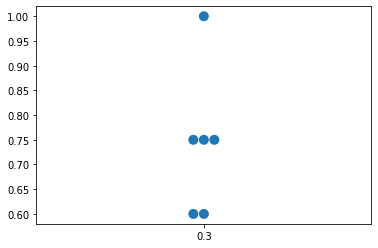

In [17]:
sns.swarmplot(x = support, y = confidence, size = 10)
plt.show()